 <div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <font color='green'> <b><u>КОММЕНТАРИЙ ТИМЛИДА</u></b><br>
Здравствуй Павел!<br>
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!
        
Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Всё хорошо.</p>
</div>

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Обрати внимание, есть потенциал</p>
</div>

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Нужно ещё раз глянуть</p>
</div>
        
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

# Промышленность 

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` — данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>ок, это хороший тон - дать описание проблематики.</p>
</div>

## План работы:

1. Загрузка и исследовательский анализ данных:
    1. Загрузка библиотек
    1. Импорт библиотек
    1. Загрузка данных
    1. Исследовательский анализ
    1. Выводы по результатам анализа
1. Предобработка данных и обучение моделей
    1. Удаление аномалий
    1. Генерация новых признаков
    1. Создание единого датафрейма
    1. Обработка пропусков
    1. Проверка на мультиколлинеарность
    1. Подготовка выборок для обучения моделей
    1. Выбор моделей
    1. Обучение моделей с определением лучшей (MAE)
    1. Проверка качества на тестовой выборке
    1. Анализ важности факторов (признаков)
    1. Вывод
1. Отчет о проделанной работе 

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя).

## Загрузка и исследовательский анализ данных

### Загрузка библиотек

Загрузим plotly для создания интерактивных графиков

In [1]:
%pip install catboost
%pip install chart_studio python-igraph
%pip install lightgbm
%pip install plotly==5.11.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Импорт библиотек

In [2]:
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
RANDOM_STATE = 100423

### Загрузка данных

In [4]:
# датасет с данными об электродах
try:
    data_arc = pd.read_csv(
        "/datasets/final_steel/data_arc.csv",
        parse_dates=["Начало нагрева дугой", "Конец нагрева дугой"],
    )
except Exception:
    print("data_arc.csv - something went wrong")


# датасет с данными о подаче сыпучих материалов (объём)
try:
    data_bulk = pd.read_csv("/datasets/final_steel/data_bulk.csv")
except Exception:
    print("data_bulk.csv - something went wrong")


# датасет с данными о подаче сыпучих материалов (время)
try:
    data_bulk_time = pd.read_csv(
        "/datasets/final_steel/data_bulk_time.csv",
        parse_dates=[f"Bulk {i+1}" for i in range(15)]
    )
except Exception:
    print("data_bulk_time.csv - something went wrong")


# датасет с данными о продувке сплава газом
try:
    data_gas = pd.read_csv("/datasets/final_steel/data_gas.csv")
except Exception:
    print("data_gas.csv - something went wrong")


# датасет с данными о результатах измерения температуры
try:
    data_temp = pd.read_csv(
        "/datasets/final_steel/data_temp.csv", parse_dates=["Время замера"]
    )
except Exception:
    print("data_temp.csv - something went wrong")


# датасет с данными о проволочных материалах (объём)
try:
    data_wire = pd.read_csv(
        "/datasets/final_steel/data_wire.csv"
    )
except Exception:
    print("data_wire.csv - something went wrong")


# датасет с данными о проволочных материалах (время)
try:
    data_wire_time = pd.read_csv(
        "/datasets/final_steel/data_wire_time.csv",
        parse_dates=[f"Wire {i+1}" for i in range(9)]
    )
except Exception:
    print("data_wire_time.csv - something went wrong")

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, данные на базе)

### Исследовательский анализ

Данные загружены. Теперь напишем функцию для вывода информации о датасете.

In [5]:
def check_df(df):
    print("СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ")
    print(
        "**************************************************************************************"
    )
    print("===ОБЩАЯ ИНФОРМАЦИЯ===")
    display(df.info())
    print(
        "**************************************************************************************"
    )
    print("===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===")
    display(df.sample(n=5))
    print(
        "**************************************************************************************"
    )
    print("===СТАТИСТИКА===")
    display(df.describe())
    print(
        "**************************************************************************************"
    )
    print("===КОЛИЧЕСТВО ДУБЛИКАТОВ===")
    print(df.duplicated().sum())
    print(
        "**************************************************************************************"
    )
    print("===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===")
    print(df.isna().sum())
    print(
        "**************************************************************************************"
    )
    print("===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===")
    print(df['key'].value_counts().max())

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
классно. Мне тоже нравится всё через функцию!!!

И функцию создания графического представления нормального распределения

In [6]:
def show_qq(df):
    fig = sm.qqplot(df, line="45"
    )
    plt.show()

**Датасет, содержащий данные об электродах:**

In [7]:
check_df(data_arc)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
4211,906,2019-06-05 17:58:55,2019-06-05 18:01:05,0.413445,0.326095
13106,2851,2019-08-18 19:18:19,2019-08-18 19:24:01,1.198412,1.028629
1352,294,2019-05-14 09:13:09,2019-05-14 09:14:10,0.207472,0.128489
5832,1269,2019-06-18 07:13:33,2019-06-18 07:17:42,0.922174,0.739259
6317,1374,2019-06-22 00:01:25,2019-06-22 00:03:34,0.477216,0.400832


**************************************************************************************
===СТАТИСТИКА===


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
16


Наблюдается отрицательное минимальное значение признака `Реактивная мощность` - явный выброс.
Также максимальное кол-во строк с одинакомым `key` говорит о нескольких итерациях нагревания расплавленной стали. Посмотрим, как часто прибегают к этому.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
согласен

In [8]:
fig = px.histogram(data_arc.key.value_counts(), text_auto=True)
fig.update_layout(
    title="Электроды. Распределение по количеству итераций",
    xaxis_title="Кол-во итераций",
    yaxis_title="Кол-во ковшей",
    showlegend=False
)
fig.show()

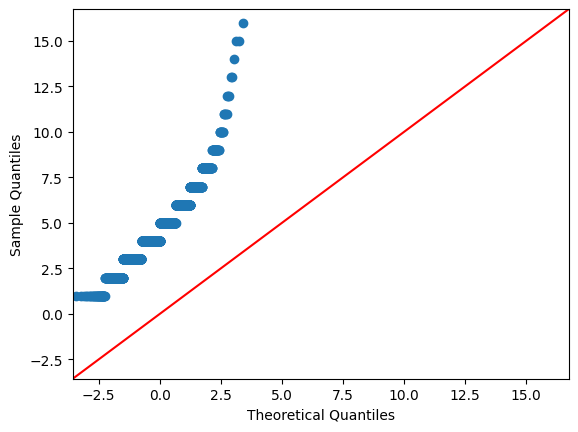

In [9]:
show_qq(data_arc.key.value_counts())

Сталь почти всегда доводят до нужной температуры больше 1 раза, но редко когда кол-во итераций превышает 10.

In [10]:
fig = px.histogram(
    data_arc,
    x="Активная мощность",
    marginal="box",
    nbins=len(np.histogram_bin_edges(data_arc["Активная мощность"], bins="fd")),
)
fig.update_layout(
    title="Распределение активной мощности",
    xaxis_title="Активная мощность",
    yaxis_title="Кол-во",
    showlegend=False
)
fig.show()

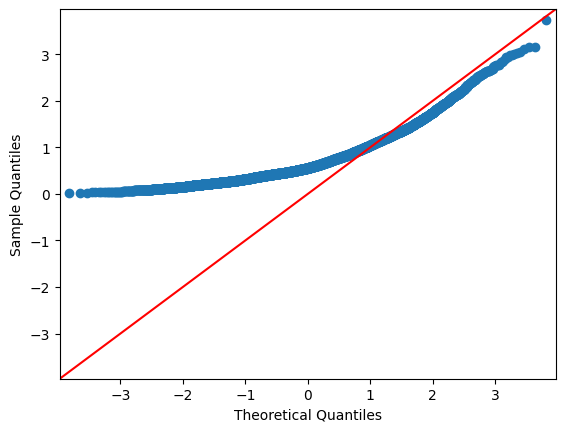

In [11]:
show_qq(data_arc["Активная мощность"])

In [12]:
fig = px.histogram(
    data_arc[data_arc["Реактивная мощность"] >= 0],
    x="Реактивная мощность",
    marginal="box",
    nbins=len(np.histogram_bin_edges(data_arc[data_arc["Реактивная мощность"] >= 0]["Реактивная мощность"], bins="fd")),
)
fig.update_layout(
    title="Распределение реактивной мощности",
    xaxis_title="Реактивная мощность",
    yaxis_title="Кол-во",
    showlegend=False
)
fig.show()

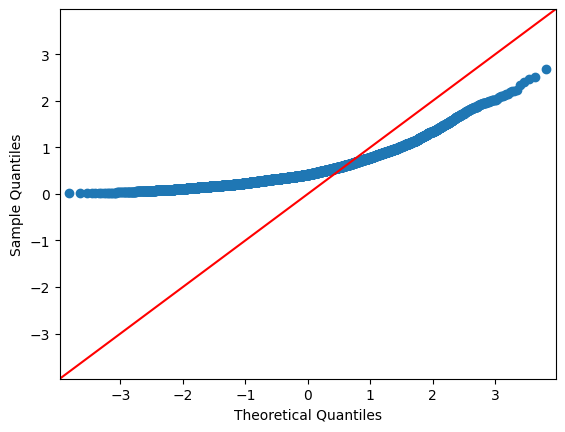

In [13]:
show_qq(data_arc.query("`Реактивная мощность` >= 0")["Реактивная мощность"])

Все графики скошены вправо. О нормальном распределении говорить не приходится. Пропусков нет. При создании гистограммы по распределению реактивной мощности был отфильтрован явный выброс с отрицательным значением мощности.

<div class="alert alert-warning" style="border-color: darkorange; border-radius: 5px">
    <p><u><b>⚠️ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
    <p>Понял. А о нормальности: верно, графический анализ чаще всего достаточен. Но для пущей уверенности можно глянуть тесты на нормальность. Вот здесь можно глянуть:<br>/www.statology.org/normality-test-python/    
    </p>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента[1]:</b> Спасибо! Почитал, применил!:)
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>Есть контакт)

**Датасет, содержащий данные о подаче сыпучих материалов (объём):**

In [14]:
check_df(data_bulk)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2068,2140,NaN,NaN,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,149.0,106.0
718,751,NaN,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,157.0,NaN,106.0
383,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,155.0,153.0
1855,1918,NaN,NaN,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0,NaN,119.0,224.0
1141,1189,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**************************************************************************************
===СТАТИСТИКА===


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
1


In [15]:
fig = make_subplots()

for i in range(15):
    fig.add_trace(go.Box(x=data_bulk[f"Bulk {i+1}"], name=f"Bulk {i+1}"))

fig.update_layout(
    title_text="Распределение объема сыпучих материалов",
    height=800,
    showlegend=False,
)
fig.show()

Наблюдается огромное количество пропусков. Так, легирующая добавка под номером 8 вообще использовалась всего один раз. В то время, как 14-й элемент используется наиболее часто. Скорее всего, это не пропуски, а потенциальные нули.
Каждая запись датафрейма представляет один "ковш", следовательно в нем указан общий объем легирующих элементов.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>ОК!

**Датасет, содержащий данные о подаче сыпучих материалов (время):**

In [16]:
check_df(data_bulk_time)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   d

None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2136,2212,NaT,NaT,2019-07-27 00:33:00,NaT,NaT,2019-07-27 00:33:00,NaT,NaT,NaT,NaT,2019-07-27 00:33:00,2019-07-27 00:20:28,NaT,2019-07-27 00:20:28,NaT
1378,1431,NaT,NaT,2019-06-23 20:48:03,2019-06-23 20:48:03,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-06-23 20:19:16,NaT,2019-06-23 20:19:16,2019-06-23 20:19:16
1089,1137,NaT,NaT,NaT,2019-06-13 18:15:37,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-06-13 18:11:25,NaT,2019-06-13 18:11:25,2019-06-13 18:11:25
662,694,NaT,NaT,2019-05-29 01:15:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-29 01:09:24,NaT,2019-05-29 01:09:24,2019-05-29 01:09:24
1686,1746,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-07-04 07:13:15,NaT,2019-07-04 07:13:15,NaT


**************************************************************************************
===СТАТИСТИКА===


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
1


Поличество пропусков соответствует количеству пропусков в предыдущем датасете, что утверждает во мнении, что это не потерянные данные, а особенность записи. 

**Датасет, содержащий данные о продувке сплава газом:**

In [17]:
check_df(data_gas)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Газ 1
1559,1562,10.401552
582,585,6.261139
2403,2406,9.535107
3053,3056,8.383198
375,378,6.462104


**************************************************************************************
===СТАТИСТИКА===


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key      0
Газ 1    0
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
1


In [18]:
fig = px.histogram(
    data_gas,
    x="Газ 1",
    marginal="box",
    nbins=len(np.histogram_bin_edges(data_gas["Газ 1"], bins="fd")),
)
fig.update_layout(
    title="Распределение данных о продувке инертным газом",
    xaxis_title="Газ",
    yaxis_title="Кол-во, раз.",
    showlegend=False
)
fig.show()

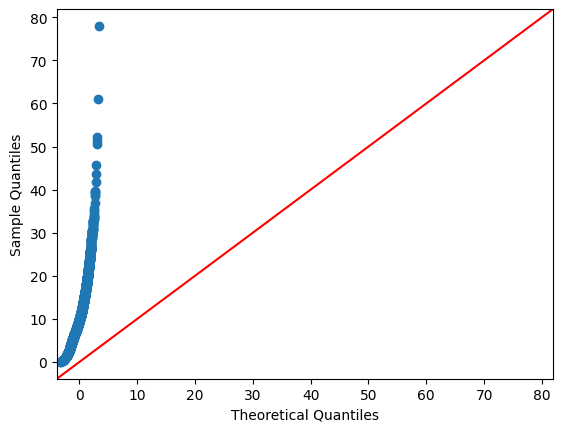

In [19]:
show_qq(data_gas['Газ 1'])

Пропусков нет. Каждая запись соответсвует одному "ковшу". Все тот же скос вправо, все также далеко от нормального распределения.

**Датасет, содержащий данные о результатах измерения температуры:**

In [20]:
try:
    data_temp = pd.read_csv(
        "/datasets/final_steel/data_temp.csv", parse_dates=["Время замера"]
    )
except Exception:
    print("Something is wrong")

In [21]:
check_df(data_temp)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Время замера,Температура
14578,2955,2019-08-22 18:54:34,NaN
8898,1816,2019-07-06 23:08:06,1591.0
12964,2637,2019-08-10 23:19:51,NaN
3970,789,2019-06-01 15:31:52,1600.0
6154,1243,2019-06-17 07:41:50,1582.0


**************************************************************************************
===СТАТИСТИКА===


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key                0
Время замера       0
Температура     2901
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
16


In [22]:
fig = px.histogram(data_temp.key.value_counts(), text_auto=True)
fig.update_layout(
    title="Температура. Распределение по количеству итераций",
    xaxis_title="Кол-во итераций",
    yaxis_title="Кол-во ковшей",
    showlegend=False
)
fig.show()

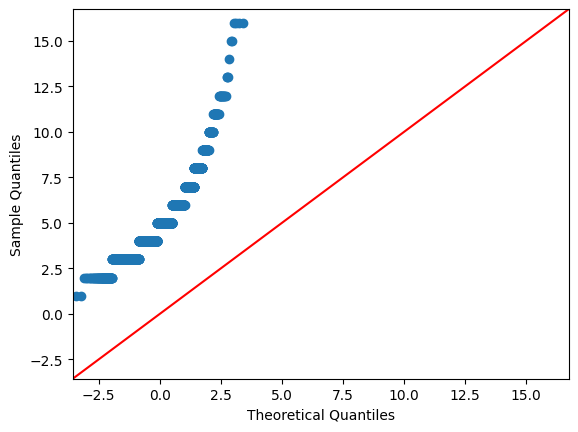

In [23]:
show_qq(data_temp.key.value_counts())

In [24]:
fig = px.histogram(
    data_temp,
    x="Температура",
    marginal="box",
    nbins=100,
)
fig.update_layout(
    title="Распределение данных о температуре",
    xaxis_title="Температура",
    yaxis_title="Кол-во нагреваний, раз.",
    showlegend=False
)
fig.show()

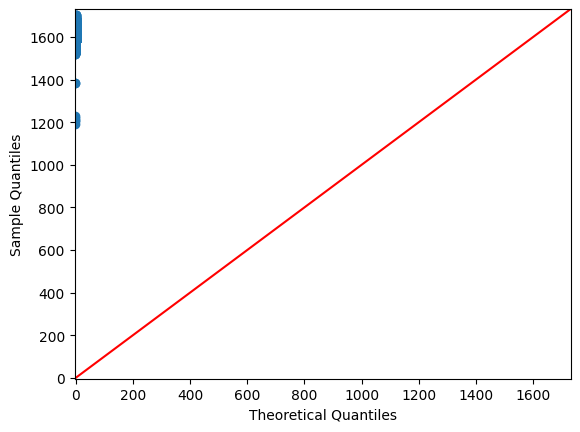

In [25]:
show_qq(data_temp['Температура'])

Данные о темературе перекликаются с данными об электодах в части распределения по количеству итераций, что вполне себе закономерно.
Из гистограммы о распределении данных о температуре можно сделать вывод, что чаще всего отливается тугоплавкая сталь, о чем свидетельствует температура в районе 1600 &deg;C

**Датасет, содержащий данные о проволочных материалах (объём):**

In [26]:
check_df(data_wire)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
612,648,105.112801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2063,2161,64.122238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2347,2473,165.852961,23.132721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,808,193.377594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2606,2740,143.052002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**************************************************************************************
===СТАТИСТИКА===


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
1


In [27]:
fig = make_subplots()

for i in range(9):
    fig.add_trace(go.Box(x=data_wire[f"Wire {i+1}"], name=f"Wire {i+1}"))

fig.update_layout(
    title_text="Распределение объема проволочных материалов",
    height=800,
    showlegend=False,
)
fig.show()

Как и в случае с сыпучими материалами, мы наблюдаем большое количество пропусков данных, которые на самом деле являются нулями, т.е. не были использованы при легировании стали в конкретном ковше. Так, 5-й элемент использовался лишь однажды, в то время как 3-й добавляется в сталь чаще остальных.

**Загрузим датасет, содержащий данные о проволочных материалах (время):**

In [28]:
check_df(data_wire_time)

СВОДНАЯ ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ
**************************************************************************************
===ОБЩАЯ ИНФОРМАЦИЯ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


None

**************************************************************************************
===5 СЛУЧАЙНЫХ СТРОК ДАТАФРЕЙМА===


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2619,2753,2019-08-15 06:11:55,2019-08-15 06:15:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT
508,543,2019-05-23 09:57:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1743,1832,2019-07-07 12:42:24,2019-07-07 12:44:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2895,3054,2019-08-26 04:02:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
119,135,2019-05-08 10:43:58,NaT,NaT,NaT,NaT,2019-05-08 10:45:26,NaT,NaT,NaT


**************************************************************************************
===СТАТИСТИКА===


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


**************************************************************************************
===КОЛИЧЕСТВО ДУБЛИКАТОВ===
0
**************************************************************************************
===ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ===
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
**************************************************************************************
===МАКСИМАЛЬНОЕ КОЛ-ВО СТРОК С ОДИНАКОВЫМ ЗНАЧЕНИМ KEY===
1


Пропуски целиком совпадают с пропусками в предыдущем датасете. 

### Выводы по резутатам анализа

Загрузив данные и проведя исследовательский анализ данных, можно сделать следущие выводы:

1. Названия признаков в исследуемых датасетах не приведены к общему виду - необходимо будет это исправить на этапе предобработки данных;
1. Типы данных признаков не везде соответствуют реально хранащимся в них данных. Например, в датасете `data_bulk` целочисленные данные хранятся в виде дробных - исправим на этапе предобработки;
1. Типы данных излишне "тяжелые". Например, хранить `key` в int64 - непозволительная роскошь и дополнительная нагрузка на вычислительные мощности. На этапе предобработки исправим;
1. Целевым признаком определим последний замер температуры для каждого ковша - `data_temp['Температура']`;
1. Пропуски в датасетах `data_bulk`, `data_bulk_time`, `data_wire`, `data_wire_time` с большей долей вероятности связаны с особенностью записи данных и фактически является не пропусками, а нулевыми значениями. Заполним нулями на этапе предобработки.
1. Датасеты содержащие данные о времени `data_bulk_time` и `data_wire_time` не представляют интереса для задачи текущего исследования. Вероятно придется от них отказаться за ненадобностью.
1. Работа с множеством датасетов будет неудобной, поэтому объединим им по признаку `key` в единый датасет.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
Выводы в конце - всегда респект!!!! Отлично.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Вопросов на текущий момент не имею, т.к. присутствовал на консультации и там все вопросы были подробно разобраны.
Хотел спросить про десульфурацию, но почитав про технологию, понял, что десульфурацию проводится параллельно с легированием и представляет собой процесс добавления элементов, которые связывают серу и выводят ее на поверхность в виде шлака, а т.к., как правило, ковши оснащены нижним сливом, сталь спокойно разливается по слябам, оставляя шлак в ковше. Так или иначе, выяснилось, что для настоящего исследования данный процесс не представляет интереса.
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА</b></u></p>
ОК, Павел, с первичным анализом - всё как надо получилось: и аналитика и графика, и выводы логичные. Замечу только, что при удалении пустот в целевой - удалять лучше всю партию.<br>
С вопроскми - ОК, понял. А по процессу - тут точно ещё много деталей!!! Но работаем, пока, с тем, что есть.<br><br>
    
Что ж, тогда вперёд к моделированию)<br>
Если возникнут вопросы - всегда в чате сможем встретиться.

## Предобработка данных и обучение моделей

### Удаление аномалий

**Исправление названий признаков**

Переименуем названия признаков и приведем их к змеиному регистру

In [29]:
data_arc.columns = ["key", "heating_start_time", "heating_end_time", "active_power", "reactive_power"]

data_bulk.rename(
    columns={f"Bulk {i+1}": f"bulk_{i+1}" for i in range(15)}, inplace=True
)

data_bulk_time.rename(
    columns={f"Bulk {i+1}": f"bulk_{i+1}" for i in range(15)}, inplace=True
)

data_gas.columns = ["key", "gas"]

data_temp.columns = ["key", "measurement_time", "temperature"]

data_wire.rename(columns={f"Wire {i+1}": f"wire_{i+1}" for i in range(9)}, inplace=True)

data_wire_time.rename(
    columns={f"Wire {i+1}": f"wire_{i+1}" for i in range(9)}, inplace=True
)

**Удаление явных выбросов**

В `data_arc` есть явный выброс с отрицательной реактивной мощностью. Удалим всю партию.

In [30]:
data_arc.query(
    f'key != {data_arc.query("reactive_power < 0")["key"].values[0]}', inplace=True
)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК

### Генерация новых признаков

Добавим в data_arc новый признак - `full_power`, который рассчитаем по формуле:
$$
S = \sqrt{P^2+Q^2}
$$
Для упрощения процесса создадим функцию:

In [31]:
def full_power_calc(row):
    return math.sqrt(row["active_power"] ** 2 + row["reactive_power"] ** 2)

И применим ее:

In [32]:
data_arc["full_power"] = data_arc.apply(full_power_calc, axis=1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>с новым фактором - ОК, понятно.

Создадим признак, содержащий количество итераций в каждой партии:

In [33]:
iteration_count = data_arc.groupby(by="key", as_index=False).count()[
    ["key", "heating_start_time"]
]
iteration_count.columns = ["key", "iteration_count"]

Объединим таблицы `data_arc` и `iteration_count`, дропнув при этом показатели активной и реактивной мощности:

In [34]:
data_arc = (
    data_arc.groupby(by="key", as_index=False)
    .sum()
    .merge(iteration_count, how="left", on="key")
    .drop(columns=["active_power", "reactive_power"], axis=1)
)

Дропнем пропуски в замерах температуры:

In [35]:
data_temp = (
    data_temp.dropna(subset=["temperature"])
    .reset_index(drop=True)
    .sort_values(by=["measurement_time"])
)

Создадим список с номерами партий, содержащих только один замер температуры:

In [36]:
single_measurement_list = (
    data_temp.groupby(by="key", as_index=False)
    .count()[
        data_temp.groupby(by="key", as_index=False).count()["measurement_time"] == 1
    ]["key"]
    .tolist()
)

data_temp.query("key not in @single_measurement_list", inplace=True)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>Это важно!! хорошо.

Группируем данные по первому и последнему замеру температуры

In [37]:
data_temp = data_temp.groupby(by="key").agg(["first", "last"]).reset_index()
data_temp.columns = data_temp.columns.droplevel()

Переименовываем названия признаков и дропаем призаки содержащие время замера

In [38]:
data_temp.columns = [
    "key",
    "measurement_time_1",
    "measurement_time_2",
    "temperature_first",
    "temperature_last",
]
data_temp.drop(["measurement_time_1", "measurement_time_2"], axis=1, inplace=True)

### Создание единого датафрейма

Объеденим преобразованные таблицы по номеру партии:

In [39]:
data = (
    data_temp.merge(data_arc, how="inner", on="key")
    .merge(data_wire, how="inner", on="key")
    .merge(data_bulk, how="inner", on="key")
    .merge(data_gas, how="inner", on="key")
)

In [40]:
data

,key,temperature_first,temperature_last,full_power,iteration_count,wire_1,wire_2,wire_3,wire_4,wire_5,...,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas
0,1,1571.0,1613.0,5.826395,5,60.059998,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0,29.749986
1,2,1581.0,1602.0,3.649216,4,96.052315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0,12.555561
2,3,1596.0,1599.0,2.989534,5,91.160157,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0,28.554793
3,4,1601.0,1625.0,3.814962,4,89.063515,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0,18.841219
4,5,1576.0,1602.0,4.035758,4,89.238236,9.11456,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2495,1570.0,1591.0,3.986869,4,89.150879,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90.0,NaN,256.0,NaN,129.0,223.0,7.125735
2324,2496,1554.0,1591.0,5.057033,6,114.179527,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,122.0,NaN,256.0,NaN,129.0,226.0,9.412616
2325,2497,1571.0,1589.0,2.885017,3,94.086723,9.04800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,230.0,NaN,124.0,226.0,6.271699
2326,2498,1591.0,1594.0,4.143749,5,118.110717,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,101.0,NaN,206.0,NaN,129.0,207.0,14.953657


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>И с мержем - в порядке)

### Обработка пропусков

И заполним пропуски нулями.

In [41]:
data.fillna(0, inplace=True)

Посмотрим на результат наших стараний:

In [42]:
data.sample(n=15)

,key,temperature_first,temperature_last,full_power,iteration_count,wire_1,wire_2,wire_3,wire_4,wire_5,...,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas
1576,1687,1595.0,1614.0,5.864679,6,142.131607,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,411.0,0.0,198.0,104.0,1.463427
2123,2272,1601.0,1579.0,2.395438,4,45.077759,32.271202,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19.0,0.0,0.0,118.0,0.0,12.981623
644,694,1564.0,1595.0,4.997643,7,94.114800,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,154.0,157.0,12.264715
1317,1414,1551.0,1579.0,4.038658,3,60.137996,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,256.0,0.0,151.0,205.0,8.495829
1006,1088,1593.0,1618.0,5.378941,4,180.133209,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,412.0,0.0,201.0,205.0,16.937201
1619,1730,1610.0,1592.0,2.127062,4,97.063194,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,345.0,0.0,177.0,125.0,11.903262
1741,1863,1588.0,1581.0,3.009851,3,85.550399,58.057999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,207.0,0.0,199.0,204.0,13.694713
427,471,1593.0,1595.0,3.293606,5,171.288010,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,153.0,3.972102
814,883,1606.0,1599.0,2.482001,2,67.064400,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,359.0,0.0,185.0,103.0,7.240750
2021,2157,1561.0,1594.0,4.715979,4,121.124634,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,61.0,0.0,329.0,0.0,196.0,190.0,7.698340


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>ОК

### Проверка на мультиколлинеарность

In [43]:
# Создаем переменную с матрицей корреляции
df_corr = data.corr().round(2)
# Создаем маску для матрицы
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Визуализируем
df_corr_viz = df_corr.mask(mask).dropna(how="all").dropna("columns", how="all")
fig = px.imshow(df_corr_viz, text_auto=True, width=1200, height=1200, color_continuous_scale='RdBu_r')
fig.update_layout(
    title="Матрица корреляции",
    showlegend=False
)
fig.show()

Выберем наиболее коррелирующие признаки:

In [44]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered.unstack().sort_values().drop_duplicates()


corrFilter(data, .7)

wire_4      bulk_7             0.740572
full_power  iteration_count    0.765804
wire_8      bulk_9             0.974969
key         key                     NaN
dtype: float64

Итак, коррелируют между собой признаки две пары сыпучих и проволочных материалов, а так же показатель полной мощности и количества итераций в партии. Что касается пар материалов, вероятно это связано с технологическим процессом и при добавлении конкретного сыпучено материала требуется добавление соответствующего проволочного, и такая явная зависимость существует только у двух пар материалов, причем у одной из них wire_8/bulk_9 эта зависимость практически равна единице. Зависимость же между полной мощностью и количеством итераций очевидна, т.к. каждая итерация подразумевает нагревание стали, а следовательно и расход энергии.

Мультиколлинеарность небольшая, но все-таки присутствует, что не очень хорошо может отразиться на качестве линейной модели, однако регурялизация признаков перед обучением позволит сгладить этот момент.

In [45]:
fig = px.imshow(
    round(
        data.corr()[["temperature_last"]].sort_values(
            by="temperature_last", ascending=False
        ),
        2,
    ),
    text_auto=True,
    height=1200,
    color_continuous_scale="RdBu_r",
)
fig.update_layout(title="Корреляция целевого признака", showlegend=False)
fig.show()

<div class="alert alert-danger" style="border-color: darkred; border-radius: 5px">
    <p><u><b>❌ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>Самое сложное - позади. Впереди только моделирование). НО осталсь ещё пара высокоррелированых факторов. (более 0.9). У тебя хорошо показан анализ ситуаци, но нет выводов поэтой части. Увидели корреляцию и какие выводы? Как это скажется/не скажется на модели?

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Графики вывел, для себя выводы сделал и поехал дальше, а описать забыл. Исправил выше:)
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 3</b></u></p>
    <p>Понял. Это и мне знакомо - что-то подумал, а не сказал. Но в голове запечатлилось, что высказал позицию. И потом искренне удивляюсь, что не послушал никто)))<br> ОК, увидел.</p>
</div>

Пятый вид проволочных материалов оказался пустым. Не очень хорошо, конечно, но что имеем. Удалим его и `key`, чтобы не мешался.

In [46]:
data.drop(["wire_5", 'key'], axis=1, inplace=True)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
    <p>С этим - согласен!.</p>
</div>

### Подготовка выборок для обучения моделей

In [47]:
features = data.drop(["temperature_last"], axis=1)
target = data["temperature_last"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE
)

In [49]:
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 1746
Размер тестовой выборки: 582


In [50]:
data

,temperature_first,temperature_last,full_power,iteration_count,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,...,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas
0,1571.0,1613.0,5.826395,5,60.059998,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986
1,1581.0,1602.0,3.649216,4,96.052315,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561
2,1596.0,1599.0,2.989534,5,91.160157,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793
3,1601.0,1625.0,3.814962,4,89.063515,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219
4,1576.0,1602.0,4.035758,4,89.238236,9.11456,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,1570.0,1591.0,3.986869,4,89.150879,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,90.0,0.0,256.0,0.0,129.0,223.0,7.125735
2324,1554.0,1591.0,5.057033,6,114.179527,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,122.0,0.0,256.0,0.0,129.0,226.0,9.412616
2325,1571.0,1589.0,2.885017,3,94.086723,9.04800,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0,6.271699
2326,1591.0,1594.0,4.143749,5,118.110717,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0,14.953657


### Выбор моделей

В рамках текущего исследования выберем для обучения 4 модели:

- Модель линейной регрессии - Ridge (Гребневая регрессия)
- "Деревянная" модель - RandomForestRegressor (Модель случайного леса)

и две модели градиентного бустинга:

- Модель градиентного бустинга от Яндекса - CatBoostRegressor
- Модель градиентного бустинга от ~~мелкомягких~~ Microsoft - LightGBMRegressor

Приступим к обучению по порядку:


### Обучение моделей с определением лучшей (MAE)

#### Ridge

Помятуя о том, что в данных у нас наблюдается мультиколлинерность, будем подбирать гиперпараметр регурялизации с использованием Pipeline и GridSearchCV.

In [51]:
%%time
# random_state не перебирается, задаём его прямо в модели
model_ridge = Ridge(random_state=RANDOM_STATE)
# создаем pipeline
pipe_ridge = Pipeline([('std_scaler', StandardScaler()), ('ridge', Ridge())])

# словарь с гиперпараметрами и значениями, которые хотим перебрать
param_grid_ridge = {
    'ridge__alpha': np.logspace(-1, 1, 10)
}
ridge = GridSearchCV(
    pipe_ridge, 
    param_grid_ridge, 
    scoring='neg_mean_absolute_error', 
    verbose=3,
    n_jobs=-1,
    cv=5
)
ridge.fit(X_train, y_train)

ridge_best_params = ridge.best_params_
ridge_best_score = abs(ridge.best_score_)


print('------------------------------')
print(f"best_params: {ridge_best_params}")
print(f"best_score: {ridge_best_score}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------------------------
best_params: {'ridge__alpha': 10.0}
best_score: 6.26827868210322
CPU times: total: 125 ms
Wall time: 3.86 s


Весьма достойный покзатель. Попали в целевое значение метрики.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>первый пошёл)

#### RandomForestRegressor

In [52]:
%%time

model_rf = RandomForestRegressor(random_state=RANDOM_STATE)

param_grid_rf = {
    "n_estimators": range(50, 701, 50),
   # 'criterion':['absolute_error']
}

rf = RandomizedSearchCV(
    model_rf,
    param_grid_rf,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    cv=5
)

rf.fit(X_train, y_train)

rf_best_params = rf.best_params_
rf_best_score = abs(rf.best_score_)

print("------------------------------")
print(f"best_params: {rf_best_params}")
print(f"best_score: {rf_best_score}")

------------------------------
best_params: {'n_estimators': 700}
best_score: 6.049550321033858
CPU times: total: 5.7 s
Wall time: 25.4 s


"Дереянная" модель дольше обучается, но тоже показывает хорошее значение метрики.

#### CatBoostRegressor

In [53]:
%%time

model_cbr = CatBoostRegressor(random_state=RANDOM_STATE)
param_grid_cbr = {
    "verbose": (0,1)
}

cbr = GridSearchCV(
    model_cbr,
    param_grid_cbr,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    cv=5
)

cbr.fit(X_train, y_train)

cbr_best_params = cbr.best_params_
cbr_best_score = abs(cbr.best_score_)

print("------------------------------")
print(f"best_params: {cbr_best_params}")
print(f"best_score: {cbr_best_score}")

------------------------------
best_params: {'verbose': 0}
best_score: 5.888671715741874
CPU times: total: 12.3 s
Wall time: 10.5 s


С каждой моделью метрика все лучше и лучше.

#### LGBMRegressor

In [54]:
%%time

model_lgbm = LGBMRegressor(random_state=RANDOM_STATE)
param_grid_lgbm = {
    "num_leaves": range(4, 31),
    "learning_rate": [0.03, 0.06, 0.09]
}
lgbm = RandomizedSearchCV(
    model_lgbm,
    param_distributions=param_grid_lgbm,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    cv=5
)
lgbm.fit(X_train, y_train)

lgbm_best_params = lgbm.best_params_
lgbm_best_score = abs(lgbm.best_score_)

print("------------------------------")
print(f"best_params: {lgbm_best_params}")
print(f"best_score: {lgbm_best_score}")

------------------------------
best_params: {'num_leaves': 25, 'learning_rate': 0.06}
best_score: 6.035799282519485
CPU times: total: 797 ms
Wall time: 705 ms


LGBM учится гораздо быстрее "кошачьей модели", но демонстрирует метрику чуть хуже.

#### Выбор лучшей модели

In [55]:
result_grid = pd.DataFrame(index=['MAE'], columns=['Ridge','RandomForestRegressor','CatBoostRegressor','LightGBM'])
result_grid['Ridge'] = ridge_best_score
result_grid['RandomForestRegressor'] = rf_best_score
result_grid['CatBoostRegressor'] = cbr_best_score
result_grid['LightGBM'] = lgbm_best_score

result_grid

,Ridge,RandomForestRegressor,CatBoostRegressor,LightGBM
MAE,6.268279,6.04955,5.888672,6.035799


### Проверка качества лучшей модели на тестовой выборке

In [56]:
cbr_prediction = cbr.predict(X_test)
cbr_mae_test = mean_absolute_error(y_test, cbr_prediction)
print("Качество метрики MAE на тестовой выборке:", cbr_mae_test) 

Качество метрики MAE на тестовой выборке: 6.003625589199768


### Анализ важности факторов (признаков)

In [57]:
fig = px.bar(
    pd.Series(
        cbr.best_estimator_.feature_importances_, index=X_test.columns
    ).sort_values(ascending=False),
    height=600,
)
fig.update_layout(
    title="График оценки важности признаков",
    xaxis_title="Признаки",
    yaxis_title="Важность, %",
    showlegend=False,
)
fig.show()

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта"). И этот баллст можно исключить и перестроить модель. Метрика не должна силно измениться. 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> т.е. некоторые супучие и проволочные материалы никак не влияют на изменение температуры? интересно. Либо их добавляют в ничтожно малых количествах, либо нагревают заранее. 
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
    <p>Они влияют конечно, но на фоне других факторов - их влияение не значительное!</p>
</div>

### Вывод

В ходе настоящего исследования мы загрузили и проанализировали данные. Сформировали новые признаки, исключили бесполезные и объединили данные в единый датасет. Разбили данные на выборки для обучения модели. Определили 4 типа моделей - Ridge, RandomForestRegeressor, CatBoostRegressor, LGBMRegressor, для которых подобрали гиперпараметры, для получения наилучшей метрики MAE. В завершении проанализировали модели, в результате чего можно сделать вывод о том, что наиболее подходящей моделью (из выбранных нами для исследования) для прогнозирования температуры стали явялется модель **CatBoostRegressor**. По качеству предсказаний ближе всего к ней была LGMBR-модель. Линейная и "деревянная" модели также показали достойное качество метрики, попав в целевой показатель - <= 6.8. В завершении, построив и проанализировав график оценки важности признаков (факторов), можно сделать вывод о том, что полная мощности и первый замер температуры являются наиболее важными факторами для прогнозирования температуры стали.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 2</b></u></p>
ОК, Павел, можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> Не увидел особо критических моментов. Вроде всё в норме) Единственное - выводов по корреляционному анализу как-то не увидел((( Добавь, пожалуйста.<br>
 
Всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>
    
Замечание нет больше (кроме корреляционного анализа). Может у тебя остались какие вопросы по проекту?

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Во-первых, огромное спасибо за такие подробные комментарии и за ревью в целом.
    
На самом деле есть над чем задуматься и, справедливости ради, признаюсь, что о многом из описанного тобой даже не задумывался. Думал про теплопроводность электродов, про вероятный нагар на них, про то, что огромное количество тепловой энергии уходит на нагревание воздуха в цехе, коль скоро ковши открыты сверху. И, вероятно, если разработать технологию ваккумного нагрева стали, то затраты энергии можно было бы снизить. А то, что температура может зависеть от бригады - это забавно именно потому что это правда. Человеческий фактор нельзя исключать - это абсолютно точно. А идея танцевать не от угадывания, а от фиксации "аномальных" температур с дальнейшим "разбором полетов", определенно имеет право на существование и очень напоминает мне идею [бережливого производства](https://ru.wikipedia.org/wiki/Бережливое_производство), вернее ей и является по большому счету)
</div>

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ ТИМЛИДА 4</b></u></p>
    <p>ДА!!!!! Бережливое производство тут тоже сработало бы. Но я больше о Деминге и "6 сигма". Хотя сейчас стараются брать лучшее из разных концепций и применять.<br>
    
ОК, увидел изменения! Слушай, такой момент пропустил, видимо, в прошлый раз - ИЗВИНИ. Там столбец кей в модели совсем НЕ нужен. Это как фамилия ковша - вряд ли влияете на бизнес-цель. Поэтому от него лучше избавиться. Эту часть, конечно же, приму. Но Ввместе с отчётом - скорректируй и кей. Тогда всё окончательно будет хорошо!</p>
    
СПАСИБО за отклик!!!!!<br>
Тогда впереди только отчёт. Что для него важно - оставлял в презентации. <br>  <br>
БУДУ ЖДАТЬ! <br>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Принял) Удалил вместе с "wire_5" после проверки на мультиколлинеарность)
</div>

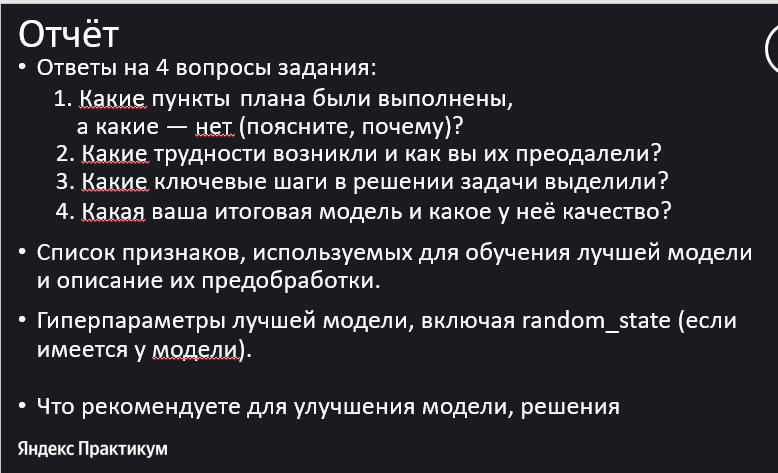

### Отчёт

Для выполнения задачи по текущему исследованию первоначально был составлен план работы, который дополнялся новыми пунктами в ходе работы. Какие-то пункты менялись местами. Но в итоге были выполнены все пункты - и намеченные на этапе исследовательского анализа, и добавленные в ходе предобработки данных и обучения моделей.

На первый взгляд описание задачи представилось достаточно сложным для понимания ввиду наличия спец.терминов и описания технологического процесса. Входные данные в виде 7-ми файлов тоже не добавляли уверенности и не вселяли оптимизм. Но, поискав информацию в интернете, пообщавшись с людьми, имеющими непосредственный опыт работы в "горячем" цехе, ситуация понемногy прояснилась.

Ключевыми шагами я бы назвал исследовательский анализ с определенимем целевого признака (`temperature_last`) и предобработку данных. GIGO никто не отменял. И именно от качественного выполнениях этих двух шагов зависел результат всего исследования,...

...а именно обученная модель CatBoostRegressor с показателем MAE на тестовой выборке равным **6.0036**

Для обучения модели использовались следующие признаки:
- `temperature_first` - первый замер температуры при обработке партии. Отсутствовал, как отдельный признак в изначальних данных был получен путем группировки датасета data_temp одновременно с целевым признаком `temperature_last`, содержащим последний замер температуры.
- `full_power` - полная мощность. Отсутстовал во входных данных и был получен путем рассчета по формуле:
$$
S = \sqrt{P^2+Q^2}
$$
где P - активная мощность, а Q - реактивная мощность.
- `iteration_count` - количество итераций нагрева партии. Сформирован путем группировки данных по признаку `key`.
- `wire_1`...`wire_9`, кроме `wire_5` - виды проволочных материалов. Содержались во входящих данных. Пропуски в данных были заполнены нулямиЮ т.к. фактически явлись не пропусками, а нулевыми значениями.
- `bulk_1`...`bulk_15` - виды сыпучих материалов. Также содержались во входящих данных и претерпели те же изменения, что и признаки проволочных материалов.
- `gas` - данные о продувке сплава газом. Содержался во входящих данных и не претерпел вообще никаких изменений, кроме переименования.

В качестве гиперпараметров для лучшей модели были выбраны:
-   `random_state` равный **100423**
-   `verbose`, подобранный с помощью GridSearchCV и получивший значение - **0 (False)**

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Если честно, то  не особо понял последний пункт - "Что рекомендуете для улучшения модели, решения." Объяснию. В предлагаемых обстоятельствах нами была выбрана наиболее подходящая модель - достаточно быстрая и попадающая в целевую метрику с запасом. Можно, конечно, еще больше "причесать" датасет, и догнать метрику до 2-3, но это не будет иметь ничего общего с рельностью и на практике модель покажет себя мягко говоря "плохо". Я специально не говорю о том, что можно долго и детально выбирать гиперпараметры и обучать модель часами, ибо буст метрики будет незначительным. Овчинка выделки не стоит. Можно попробовать использовать нейросетки, но это уже будет другая модель, да и опять же какого-то космического буста и попадания "в точку" ждать не приходится)
Изменение технологического и административного регламента на предприятии я не рассматривал, как возможные способы улучшения модели :)
</div>